# **Problem Statement**
To build a multiclass classification model using a custom convolutional neural network in TensorFlow. 
To build a CNN based model which can accurately detect melanoma a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



## Lets Importing Skin Cancer Data

**Importing all the important libraries**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')

In [2]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:



*  Actinic keratosis
*  Basal cell carcinoma
*  Dermatofibroma
*  Melanoma
*  Nevus
*  Pigmented benign keratosis
*  Seborrheic keratosis
*  Squamous cell carcinoma
*  Vascular lesion



 

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

**Create a dataset**

Define some parameters for the loader:

In [5]:
batch_size = 32 
img_height = 180 
img_width = 180

Now Lets Use 80% of the images for training, and 20% for validation.

In [6]:
# Lets use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Lets resize images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='training',
            )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Lets use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Lets resize images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### Lets List out all the classes of skin cancer and store them in a list. 

In [9]:
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

* Lets create a code to visualize one instance of all the nine classes present in the dataset

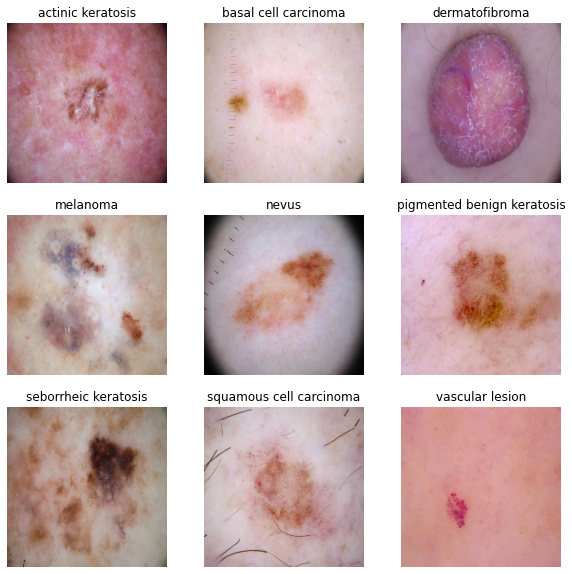

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

* The **image_batch** is a tensor of the shape **(32, 180, 180, 3)**. This is a batch of **32 images **of shape **180x180x3** (the last dimension refers to color channels RGB).

* The **label_batch** is a tensor of the shape **(32,),** these are corresponding labels to the 32 images.

* **Dataset.cache()** keeps the images in memory after they're loaded off disk during the first epoch.

* **Dataset.prefetch()** overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model

**Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use** layers.experimental.preprocessing.Rescaling **to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]**

In [12]:

num_class = 9
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180,180,3)),

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2),    

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2),

    layers.Conv2D(128,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),

    layers.Dense(num_class, activation='softmax')
])

# Lets Compile the model

* Choose an appropirate optimiser and loss function for model training

In [13]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

# Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 76s 793ms/step - loss: 1.9763 - accuracy: 0.2801 - val_loss: 1.7138 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6214 - accuracy: 0.4258 - val_loss: 1.4929 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4858 - accuracy: 0.4782 - val_loss: 1.4947 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.3314 - accuracy: 0.5329 - val_loss: 1.4171 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2667 - accuracy: 0.5508 - val_loss: 1.4550 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2211 - accuracy: 0.5592 - val_loss: 1.4640 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.1065 - accuracy: 0.6239 - val_loss: 1.6223 - val_accuracy: 0.4541
Epoch 8/20


# Visualizing training results

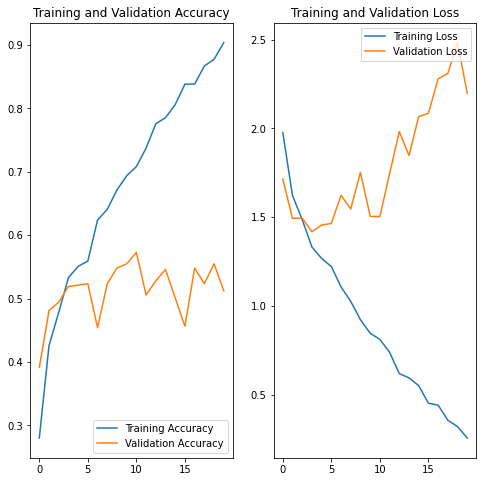

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Checking the Overfitting or Underfitting of the model

- The model is clearly overfitting model.

- The training accuracy is gradually increasing.

* The validation accuracy is fluctuating around 50%.

- The loss on training set decreases after each epoch but in case of the validation loss, its increasing after decreasing for few initial epochs.

- The model memorized the data instead of generalizing and learning real features and general relationships.

In [18]:
# choosing an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical', input_shape= (img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    ])

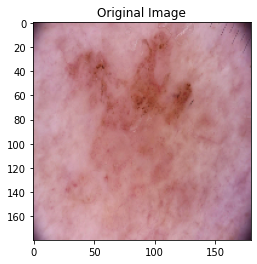

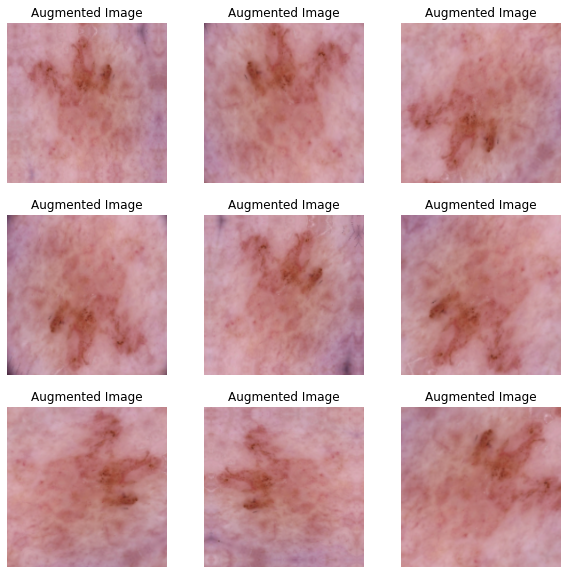

In [19]:
# Visualising how your augmentation strategy works for one instance of training image.


for image, label in train_ds.take(1):
  plt.title("Original Image")
  plt.imshow(image[0]/255)
  plt.figure(figsize=(10,10))
  for i in range(9):
    augmented_image = data_augmentation(image, training=True)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Augmented Image")
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")




# Now Lets Create the model, compile and train the model

**Along with augmentation, adding dropout considering previous experimentation is overfitted**

In [20]:
num_class = 9
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180,180,3)),

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),    
    layers.Dropout(0.2),

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),

    layers.Conv2D(128,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(num_class, activation='softmax')
])

# Lets Compiling the model

In [21]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

# Training the model

In [22]:
#retrain your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 73ms/step - loss: 2.2058 - accuracy: 0.1886 - val_loss: 2.0746 - val_accuracy: 0.3311
Epoch 2/20
56/56 [==============================] - 4s 71ms/step - loss: 1.9544 - accuracy: 0.2729 - val_loss: 1.9115 - val_accuracy: 0.3714
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.7977 - accuracy: 0.3465 - val_loss: 1.8160 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 4s 70ms/step - loss: 1.6657 - accuracy: 0.3884 - val_loss: 1.5825 - val_accuracy: 0.4385
Epoch 5/20
56/56 [==============================] - 4s 70ms/step - loss: 1.6798 - accuracy: 0.3761 - val_loss: 1.5453 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 4s 70ms/step - loss: 1.5850 - accuracy: 0.4353 - val_loss: 1.5746 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 4s 70ms/step - loss: 1.5221 - accuracy: 0.4492 - val_loss: 1.4987 - val_accuracy: 0.4743
Epoch 8/20
56

# Lets Visualize the results

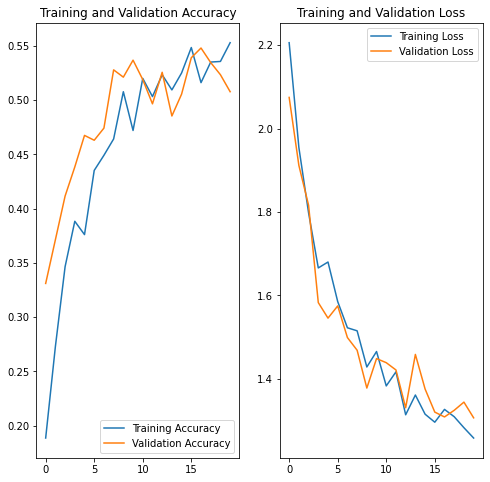

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Checking the Overfitting or Underfitting of the model
### Lets Compare the improvement of the model we got now to the previous model run?

- The application of data augmentation and dropout layer reduced overfitting.
- Results on training and validation datasets are much closer.
- Overall accuracy is not high.

# Lets Find the distribution of classes in the training dataset.



<BarContainer object of 9 artists>

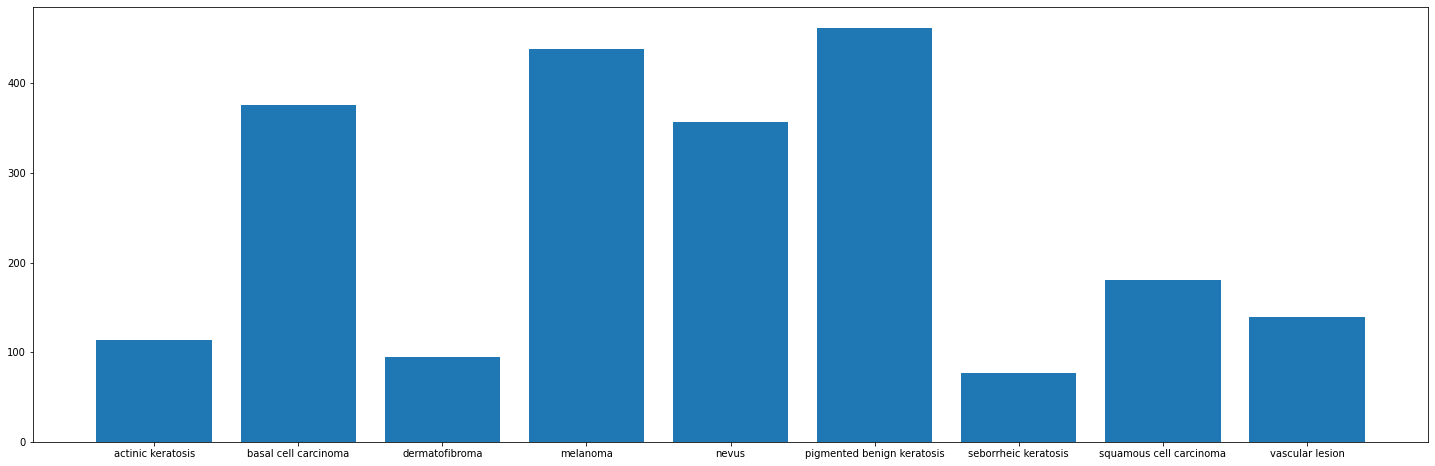

In [25]:
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,8))
plt.bar(class_names,class_count)




  - seborrheic keratosis Has the least number of samples

###  the classed that have data with proportionate number of samples are as followed
  - pigmented benign keratosis
  - melanoma
  - basal cell carcinoma
  - nevus

Lets Rectify the class imbalance

**Note:** We can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [27]:
path_to_training_dataset='/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F03540F2110>: 100%|██████████| 500/500 [00:21<00:00, 23.49 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F035419DED0>: 100%|██████████| 500/500 [00:21<00:00, 22.97 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F035415A510>: 100%|██████████| 500/500 [00:22<00:00, 22.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F036C14A210>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F0354047050>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F03540E73D0>: 100%|██████████| 500/500 [00:19<00:00, 26.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F035406F250>: 100%|██████████| 500/500 [00:41<00:00, 12.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F036C9A6350>: 100%|██████████| 500/500 [00:18<00:00, 26.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F036C89F710>: 100%|██████████| 500/500 [00:18<00:00, 27.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [29]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029856.jpg_3405d2d2-dd39-41c5-bccc-b43c9d684620.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029341.jpg_59d34e0f-2f46-4cf2-8775-9cc400918710.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027478.jpg_f6d3a801-faf9-451f-b64c-e8363f608f18.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_f7437a59-f71e-40bf-8696-06a76f65c8af.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [34]:
df2['Label'].value_counts()

basal cell carcinoma          500
pigmented benign keratosis    500
vascular lesion               500
dermatofibroma                500
seborrheic keratosis          500
melanoma                      500
squamous cell carcinoma       500
actinic keratosis             500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# Lets Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

# Lets Create a training dataset

In [36]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Lets Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Creating the model

In [38]:
tf.keras.backend.clear_session()

num_class = 9
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    
    layers.Conv2D(32,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),    
    layers.Dropout(0.2),

    layers.Conv2D(64,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),

    layers.Conv2D(128,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(num_class, activation='softmax')
])

# Lets compile the model by choosing optimizer and loss function 

In [39]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Lets Train model

In [40]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 186ms/step - loss: 1.6880 - accuracy: 0.3739 - val_loss: 3.4449 - val_accuracy: 0.1938
Epoch 2/30
169/169 [==============================] - 36s 209ms/step - loss: 1.3681 - accuracy: 0.4961 - val_loss: 3.6370 - val_accuracy: 0.2049
Epoch 3/30
169/169 [==============================] - 32s 181ms/step - loss: 1.1846 - accuracy: 0.5645 - val_loss: 2.0386 - val_accuracy: 0.3905
Epoch 4/30
169/169 [==============================] - 32s 181ms/step - loss: 1.0681 - accuracy: 0.6098 - val_loss: 2.3549 - val_accuracy: 0.3549
Epoch 5/30
169/169 [==============================] - 32s 181ms/step - loss: 0.9496 - accuracy: 0.6576 - val_loss: 2.1593 - val_accuracy: 0.3712
Epoch 6/30
169/169 [==============================] - 31s 181ms/step - loss: 0.8514 - accuracy: 0.6975 - val_loss: 1.3395 - val_accuracy: 0.5457
Epoch 7/30
169/169 [==============================] - 31s 179ms/step - loss: 0.7245 - accuracy: 0.7443 - val_loss: 1.0445 - val_ac

# Lets Visualize the model results

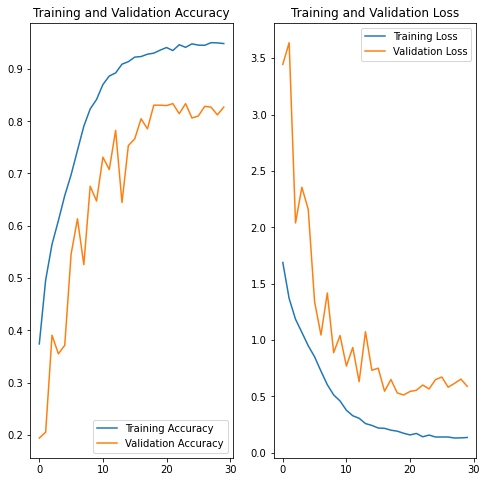

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# With only Dropout, without BatchNormalization
tf.keras.backend.clear_session()

num_class = 9
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    
    layers.Conv2D(32,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),    
    layers.Dropout(0.2),

    layers.Conv2D(64,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),

    layers.Conv2D(128,3,padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 34s 190ms/step - loss: 2.0835 - accuracy: 0.2302 - val_loss: 1.7277 - val_accuracy: 0.3615
Epoch 2/30
169/169 [==============================] - 32s 187ms/step - loss: 1.5533 - accuracy: 0.4117 - val_loss: 1.4600 - val_accuracy: 0.4521
Epoch 3/30
169/169 [==============================] - 32s 183ms/step - loss: 1.3563 - accuracy: 0.4902 - val_loss: 1.2765 - val_accuracy: 0.5212
Epoch 4/30
169/169 [==============================] - 32s 182ms/step - loss: 1.2785 - accuracy: 0.5224 - val_loss: 1.2263 - val_accuracy: 0.5286
Epoch 5/30
169/169 [==============================] - 32s 181ms/step - loss: 1.1228 - accuracy: 0.5849 - val_loss: 1.1044 - val_accuracy: 0.5694
Epoch 6/30
169/169 [==============================] - 32s 182ms/step - loss: 1.0504 - accuracy: 0.6118 - val_loss: 1.0975 - val_accuracy: 0.5754
Epoch 7/30
169/169 [==============================] - 32s 183ms/step - loss: 0.9883 - accuracy: 0.6397 - val_loss: 1.0011 - val_ac

# Lets Visualize Results

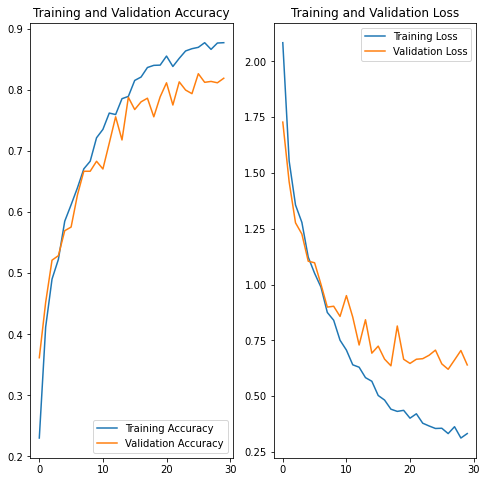

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Result Analysis 

- Changes done for data imbalance helped in improving training and validation accuracy.

- On top of data imbalance changes, tried two options
  - With dropout and batch normalization
  - With only dropout

- Even though validation accuracy increased, still there is 0.1 gap between training and validation accuracy.

In [44]:
#checking the performance on the test set 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  y_true=list(labels.numpy())
  predict_x=model.predict(images) 
  y_pred=np.argmax(predict_x,axis=1)
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

Found 118 files belonging to 9 classes.
4/4 [==============================] - 0s 86ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.57      0.25      0.35        16
      basal cell carcinoma       0.50      0.31      0.38        16
            dermatofibroma       0.27      0.19      0.22        16
                  melanoma       0.13      0.12      0.13        16
                     nevus       0.38      0.69      0.49        16
pigmented benign keratosis       0.29      0.62      0.39        16
      seborrheic keratosis       0.33      0.33      0.33         3
   squamous cell carcinoma       0.60      0.19      0.29        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.35       118
                 macro avg       0.42      0.37      0.36       118
              weighted avg       0.40      0.35      0.33       118

Accuracy on test data